Installing dependencies and reading in the data from socrata open data website using json api

In [3]:
import json
import pandas as pd
df = pd.read_json('https://opendata.socrata.com/resource/ed74-c6ni.json')
df.head()

,artist,spotify_url,theme,title,year
0,ABC,{'url': 'http://open.spotify.com/track/78j3qTB...,Love,The Look of Love,1982
1,Badly Drawn Boy,{'url': 'http://open.spotify.com/track/2PojSoZ...,Love,The Shining,2000
2,The Beach Boys,{'url': 'http://open.spotify.com/track/0ObrXLr...,Love,God Only Knows,1966
3,The Beach Boys,{'url': 'http://open.spotify.com/track/2oF7FZH...,Love,Good Vibrations,1966
4,The Beach Boys,{'url': 'http://open.spotify.com/track/0cx32rX...,Love,Wouldn’t It Be Nice,1966


In [4]:
df.shape

(994, 5)

In [12]:
df.isnull().sum()

artist           0
spotify_url    222
theme            0
title            0
year             0
dtype: int64

In [13]:
df.drop(columns = ['spotify_url'], inplace = True)

# Generating important insights from the data and plotting them using the matplotlib library

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
#Finding the top 5 most featured artists in the list
df['artist'].value_counts().head()

Bob Dylan             24
The Beatles           19
David Bowie            9
The Rolling Stones     8
Randy Newman           8
Name: artist, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

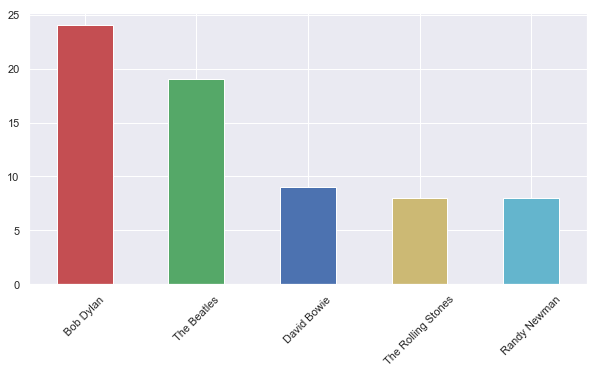

In [27]:
#Plotting the results in form of a bar graph
df['artist'].value_counts().head().plot(kind = 'bar', figsize = (10,5), color = ['r','g','b','y','c'])
plt.xticks(rotation = 45)

# Analyzing categorically by Artist

Creating a sub dataframe named "Beatles"

In [17]:
#Forming a sub dataframe for The Beatles from our existing dataframe
Beatles = df.loc[df.artist == 'The Beatles', :]
Beatles

,artist,theme,title,year
5,The Beatles,Love,Eight Days a Week,1964
6,The Beatles,Love,Girl,1965
7,The Beatles,Love,I Want to Hold Your Hand,1963
8,The Beatles,Love,She Loves You,1963
9,The Beatles,Love,Something,1969
10,The Beatles,Love,With a Little Help from My Friends,1967
146,The Beatles,Heartbreak,You’ve Got to Hide Your Love Away,1965
291,The Beatles,People and places,Eleanor Rigby,1966
292,The Beatles,People and places,Doctor Robert,1966
293,The Beatles,People and places,Drive My Car,1965


Categorizing the featured songs by 'The Beatles' by theme

In [18]:
#Categorizing by theme using the groupby function
Beatles.groupby(['theme'])['title'].count()

theme
Heartbreak              1
Life and death          2
Love                    6
People and places       6
Politics and protest    2
Sex                     2
Name: title, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

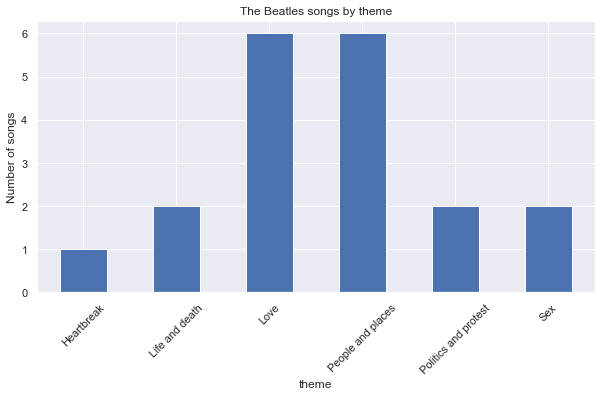

In [26]:
#Plotting the results in form of a bar chart
Beatles.groupby(['theme'])['title'].count().plot(kind = 'bar', figsize = (10,5))
plt.ylabel('Number of songs')
plt.title('The Beatles songs by theme')
plt.xticks(rotation = 45)

Creating a sub dataframe BD for Bob Dylan

In [21]:
BD = df.loc[df.artist == 'Bob Dylan', :]
BD

,artist,theme,title,year
45,Bob Dylan,Love,Girl from the North Country,1963
46,Bob Dylan,Love,Visions of Johanna,1966
47,Bob Dylan,Love,Wedding Song,1974
175,Bob Dylan,Heartbreak,"Don’t Think Twice, It’s All Right",1963
176,Bob Dylan,Heartbreak,Idiot Wind,1975
177,Bob Dylan,Heartbreak,"If You See Her, Say Hello",1975
178,Bob Dylan,Heartbreak,Just Like a Woman,1966
179,Bob Dylan,Heartbreak,She’s Your Lover Now,1966
180,Bob Dylan,Heartbreak,Tangled up in Blue,1975
343,Bob Dylan,People and places,Ballad of a Thin Man,1965


In [22]:
#Categorizing by theme using the groupby function
BD.groupby(['theme'])['title'].count()

theme
Heartbreak              6
Life and death          5
Love                    3
People and places       3
Politics and protest    5
Sex                     2
Name: title, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

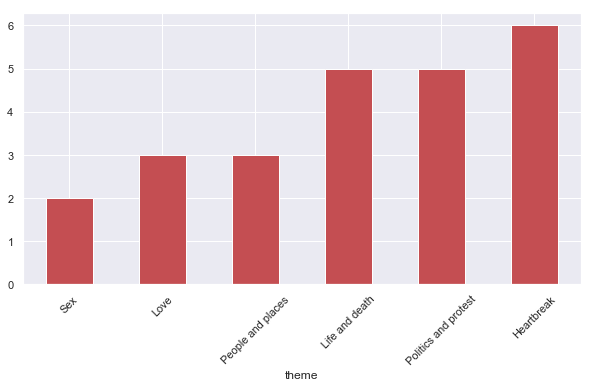

In [25]:
# Plotting the results by means of a bar plot and using the plot function
BD.groupby(['theme'])['title'].count().sort_values().plot(kind = 'bar', figsize = (10,5), color = ['r'])
plt.xticks(rotation = 45)

Creating a subdataframe DB for David Bowie

In [29]:
DB = df.loc[df.artist == 'David Bowie', :]
DB

,artist,theme,title,year
17,David Bowie,Love,Heroes,1977
18,David Bowie,Love,The Wedding Song,1993
152,David Bowie,Heartbreak,Letter to Hermione,1969
153,David Bowie,Heartbreak,Repetition,1979
306,David Bowie,People and places,Life On Mars?,1971
307,David Bowie,People and places,Space Oddity,1969
714,David Bowie,Life and death,Kooks,1971
715,David Bowie,Life and death,Never Get Old,2003
850,David Bowie,Party songs,Let’s Dance,1983


In [30]:
DB.groupby(['theme'])['title'].count()

theme
Heartbreak           2
Life and death       2
Love                 2
Party songs          1
People and places    2
Name: title, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

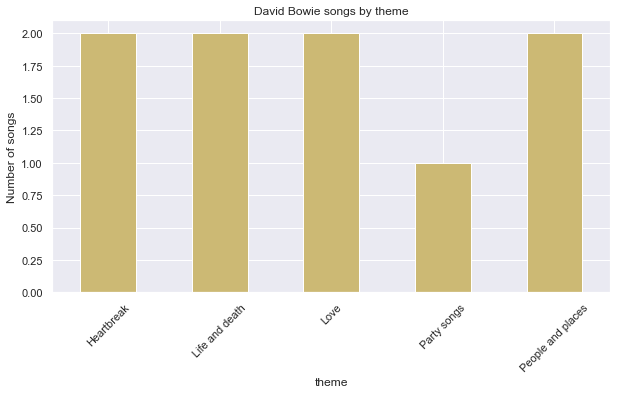

In [31]:
DB.groupby(['theme'])['title'].count().plot(kind = 'bar', figsize = (10,5), color = ['y'])
plt.ylabel('Number of songs')
plt.title('David Bowie songs by theme')
plt.xticks(rotation = 45)

# Analysing the data categorically by theme

In [32]:
#Grouping by theme of the song and counting the no. of songs in the dataset for each theme
df.groupby('theme').artist.count()

theme
Heartbreak              145
Life and death          131
Love                    139
Party songs             162
People and places       145
Politics and protest    141
Sex                     131
Name: artist, dtype: int64

Text(0.5, 1.0, 'No. of songs by theme')

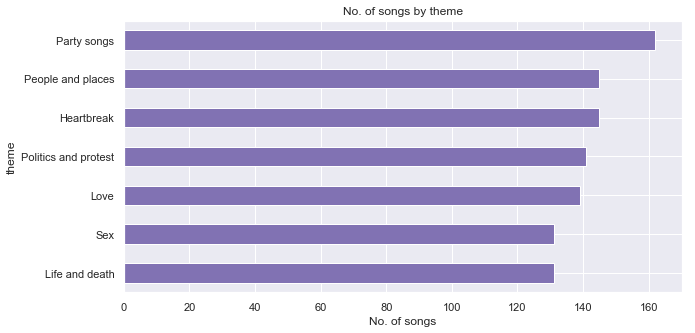

In [33]:
#Plotting the result in form of a horizontal bar chart after sorting them 
df.groupby('theme').artist.count().sort_values().plot('barh', figsize = (10,5), color = 'm')
plt.xlabel('No. of songs')
plt.title('No. of songs by theme')

In [34]:
#Create a subdataframe "Love" fom the actual dataframe
Love = df.loc[df.theme == 'Love', :]
Love.head()

,artist,theme,title,year
0,ABC,Love,The Look of Love,1982
1,Badly Drawn Boy,Love,The Shining,2000
2,The Beach Boys,Love,God Only Knows,1966
3,The Beach Boys,Love,Good Vibrations,1966
4,The Beach Boys,Love,Wouldn’t It Be Nice,1966


The top five artists under the theme "Love"

In [35]:
#grouping by artists and applying the count method and sorting them in descending order
Love.groupby(['artist'])['title'].count().sort_values(ascending = False).head()

artist
The Beatles       6
Kate Bush         3
The Beach Boys    3
Al Green          3
Frank Sinatra     3
Name: title, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

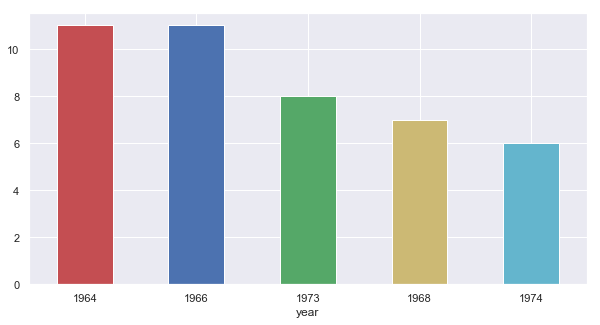

In [41]:
Love.set_index('year')
Love.groupby(['year'])['artist'].count().sort_values(ascending = False).head().plot(kind = 'bar', 
                                                                                    color = ['r','b','g','y','c'],
                                                                                   figsize = (10,5))
plt.xticks(rotation = 0)

Create a subdataframe "Party" fom the actual dataframe

In [42]:
Party = df.loc[df.theme == 'Party songs', :]
Party.head()

,artist,theme,title,year
832,808 State,Party songs,Pacific State,1989
833,Abba,Party songs,Dancing Queen,1976
834,AC/DC,Party songs,Back in Black,1980
835,Afroman,Party songs,Because I Got High,2001
836,Althea and Donna,Party songs,Uptown Top Ranking,1977


The top five artists featured in the Party songs theme

In [43]:
#Grouping the party subdataframe by 'artist' and using the count method and sorting them in descending order 
Party.groupby(['artist'])['title'].count().sort_values(ascending = False).head()

artist
Madonna            3
Sister Sledge      2
Grace Jones        2
Prince             2
Michael Jackson    2
Name: title, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

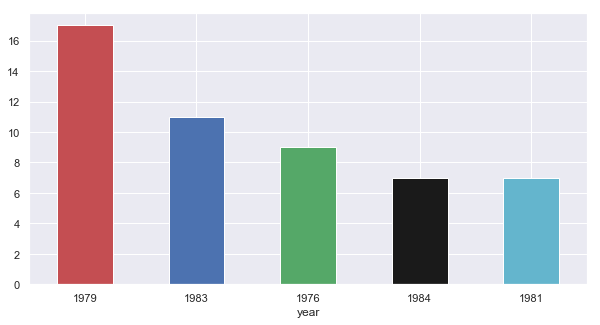

In [44]:
Party.set_index('year')
Party.groupby(['year'])['artist'].count().sort_values(ascending = False).head().plot(kind = 'bar', 
                                                                                    color = ['r','b','g','k','c'], 
                                                                                    figsize = (10,5))
plt.xticks(rotation = 0)